# INSIGHTS INTO RETAIL OPERATIONS: A COMPREHENSIVE ANALYSIS OF ACX MEGAMART RETAIL STORE


## Data Analysis and Visualization on ACX Megamart Retail Store

### Installation of Packages

In [51]:
!mamba install bs4==4.10.0 -y 
!mamba install html5lib==1.1 -y 
!pip install yfinance==0.1.67
!pip install yfinance pandas tabulate
!pip install seaborn
!pip install scipy
!pip install datapackage
!pip install matplotlib
!pip install pandas matplotlib
!pip install numpy==1.24.3
!pip install pandas==1.3.3 
!pip install requests==2.26.0 
!pip install lxml==4.6.4
!pip install plotly==5.3.1

Traceback (most recent call last):
  File "/Users/shashankshandilya/anaconda3/condabin/mamba", line 7, in <module>
    from mamba.mamba import main
  File "/Users/shashankshandilya/anaconda3/lib/python3.10/site-packages/mamba/mamba.py", line 14, in <module>
    from conda.base.constants import ChannelPriority, DepsModifier, UpdateModifier
  File "/Users/shashankshandilya/anaconda3/lib/python3.10/site-packages/conda/__init__.py", line 10, in <module>
    from .deprecations import deprecated
ModuleNotFoundError: No module named 'conda.deprecations'
Traceback (most recent call last):
  File "/Users/shashankshandilya/anaconda3/condabin/mamba", line 7, in <module>
    from mamba.mamba import main
  File "/Users/shashankshandilya/anaconda3/lib/python3.10/site-packages/mamba/mamba.py", line 14, in <module>
    from conda.base.constants import ChannelPriority, DepsModifier, UpdateModifier
  File "/Users/shashankshandilya/anaconda3/lib/python3.10/site-packages/conda/__init__.py", line 10, in <m

### Importing the packages

In [52]:
import pandas as pd                  
import matplotlib.pyplot as plt      
import numpy as np                   
import seaborn as sns                
from copy import copy                
from scipy import stats     
from datetime import datetime         
import plotly.express as px          
import plotly.figure_factory as ff   
import plotly.graph_objects as go
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from tabulate import tabulate
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import matplotlib.ticker as ticker

### Importing the ACX Megamart Excel Data

In [53]:
ACX_df = pd.read_excel("/Users/shashankshandilya/Desktop/PowerBI Data/ACXmegamart.xlsx")
print(ACX_df)

       Row ID                  Order ID Order Date            Ship Date   
0       42433    AG-2019-TB112803-40909 2019-01-01  2019-01-06 00:00:00  \
1       22253    IN-2019-JH159857-40909 2019-01-01  2019-01-08 00:00:00   
2       48883     HU-2019-AT73557-40909 2019-01-01  2019-01-05 00:00:00   
3       11731  IT-2019-EM14140124-40909 2019-01-01  2019-01-05 00:00:00   
4       22255    IN-2019-JH159857-40909 2019-01-01  2019-01-08 00:00:00   
...       ...                       ...        ...                  ...   
51232   47594    MO-2022-LP709586-42369 2022-12-31  2023-01-05 00:00:00   
51233   27700   IN-2022-KM1622527-42369 2022-12-31  2023-01-07 00:00:00   
51234    8857   MX-2022-CM1219093-42369 2022-12-31  2023-01-02 00:00:00   
51235    2143   MX-2022-JB1604582-42369 2022-12-31  2023-01-04 00:00:00   
51236    6852   MX-2022-TD2099582-42369 2022-12-31  2023-01-06 00:00:00   

            Ship Mode  Customer ID     Customer Name      Segment   
0      Standard Class    TB-11

### Sorting and cleaning of ACX Megamart Data

In [54]:
from IPython.display import display
display(ACX_df)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2019-TB112803-40909,2019-01-01,2019-01-06 00:00:00,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,...,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.460,Medium
1,22253,IN-2019-JH159857-40909,2019-01-01,2019-01-08 00:00:00,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.720,Medium
2,48883,HU-2019-AT73557-40909,2019-01-01,2019-01-05 00:00:00,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,...,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.170,High
3,11731,IT-2019-EM14140124-40909,2019-01-01,2019-01-05 00:00:00,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,...,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.820,High
4,22255,IN-2019-JH159857-40909,2019-01-01,2019-01-08 00:00:00,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.700,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51232,47594,MO-2022-LP709586-42369,2022-12-31,2023-01-05 00:00:00,Standard Class,LP-709586,Liz Preis,Consumer,NaN,Agadir,...,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,1.490,Medium
51233,27700,IN-2022-KM1622527-42369,2022-12-31,2023-01-07 00:00:00,Standard Class,KM-1622527,Kalyca Meade,Corporate,NaN,Shantou,...,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.470,3,0.0,25.380,1.410,Medium
51234,8857,MX-2022-CM1219093-42369,2022-12-31,2023-01-02 00:00:00,Second Class,CM-1219093,Charlotte Melton,Consumer,NaN,Managua,...,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.360,1.350,Medium
51235,2143,MX-2022-JB1604582-42369,2022-12-31,2023-01-04 00:00:00,Standard Class,JB-1604582,Julia Barnett,Home Office,NaN,Reynosa,...,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.740,3,0.0,0.660,1.324,Medium


In [55]:
ACX_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2019-TB112803-40909,2019-01-01,2019-01-06 00:00:00,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,...,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2019-JH159857-40909,2019-01-01,2019-01-08 00:00:00,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2019-AT73557-40909,2019-01-01,2019-01-05 00:00:00,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,...,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2019-EM14140124-40909,2019-01-01,2019-01-05 00:00:00,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,...,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2019-JH159857-40909,2019-01-01,2019-01-08 00:00:00,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [56]:
ACX_df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51232,47594,MO-2022-LP709586-42369,2022-12-31,2023-01-05 00:00:00,Standard Class,LP-709586,Liz Preis,Consumer,NaN,Agadir,...,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.0,0.42,1.490,Medium
51233,27700,IN-2022-KM1622527-42369,2022-12-31,2023-01-07 00:00:00,Standard Class,KM-1622527,Kalyca Meade,Corporate,NaN,Shantou,...,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.0,25.38,1.410,Medium
51234,8857,MX-2022-CM1219093-42369,2022-12-31,2023-01-02 00:00:00,Second Class,CM-1219093,Charlotte Melton,Consumer,NaN,Managua,...,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.0,12.36,1.350,Medium
51235,2143,MX-2022-JB1604582-42369,2022-12-31,2023-01-04 00:00:00,Standard Class,JB-1604582,Julia Barnett,Home Office,NaN,Reynosa,...,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.0,0.66,1.324,Medium
51236,6852,MX-2022-TD2099582-42369,2022-12-31,2023-01-06 00:00:00,Standard Class,TD-2099582,Tamara Dahlen,Consumer,NaN,Juárez,...,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.0,0.56,1.199,Medium


In [57]:
ACX_df.shape

(51237, 24)

In [58]:
ACX_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51237 entries, 0 to 51236
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51237 non-null  int64         
 1   Order ID        51237 non-null  object        
 2   Order Date      51237 non-null  datetime64[ns]
 3   Ship Date       51237 non-null  object        
 4   Ship Mode       51237 non-null  object        
 5   Customer ID     51237 non-null  object        
 6   Customer Name   51237 non-null  object        
 7   Segment         51237 non-null  object        
 8   Postal Code     9984 non-null   float64       
 9   City            51237 non-null  object        
 10  State           51237 non-null  object        
 11  Country         51237 non-null  object        
 12  Region          51237 non-null  object        
 13  Market          51237 non-null  object        
 14  Product ID      51237 non-null  object        
 15  Ca

### 1. Analysis and Visualization of Sales, Profit, Quantity and Discount

#### a. Histogram of Sales, Profit, Quantity and, Discount

<Figure size 2000x1500 with 0 Axes>

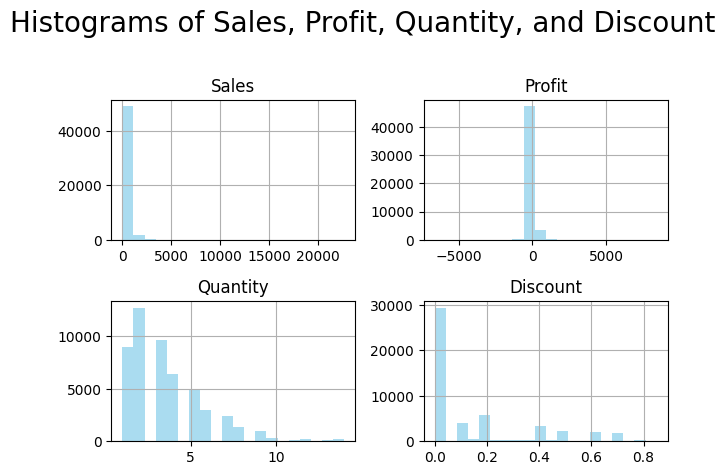

In [59]:
plt.figure(figsize=(20, 15))
ACX_df.hist(column=['Sales', 'Profit', 'Quantity', 'Discount'], bins=20, color='skyblue', alpha=0.7)
plt.suptitle('Histograms of Sales, Profit, Quantity, and Discount', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### b. Pairplot of Profit, Discount, Quantity, and Sales (by Category)

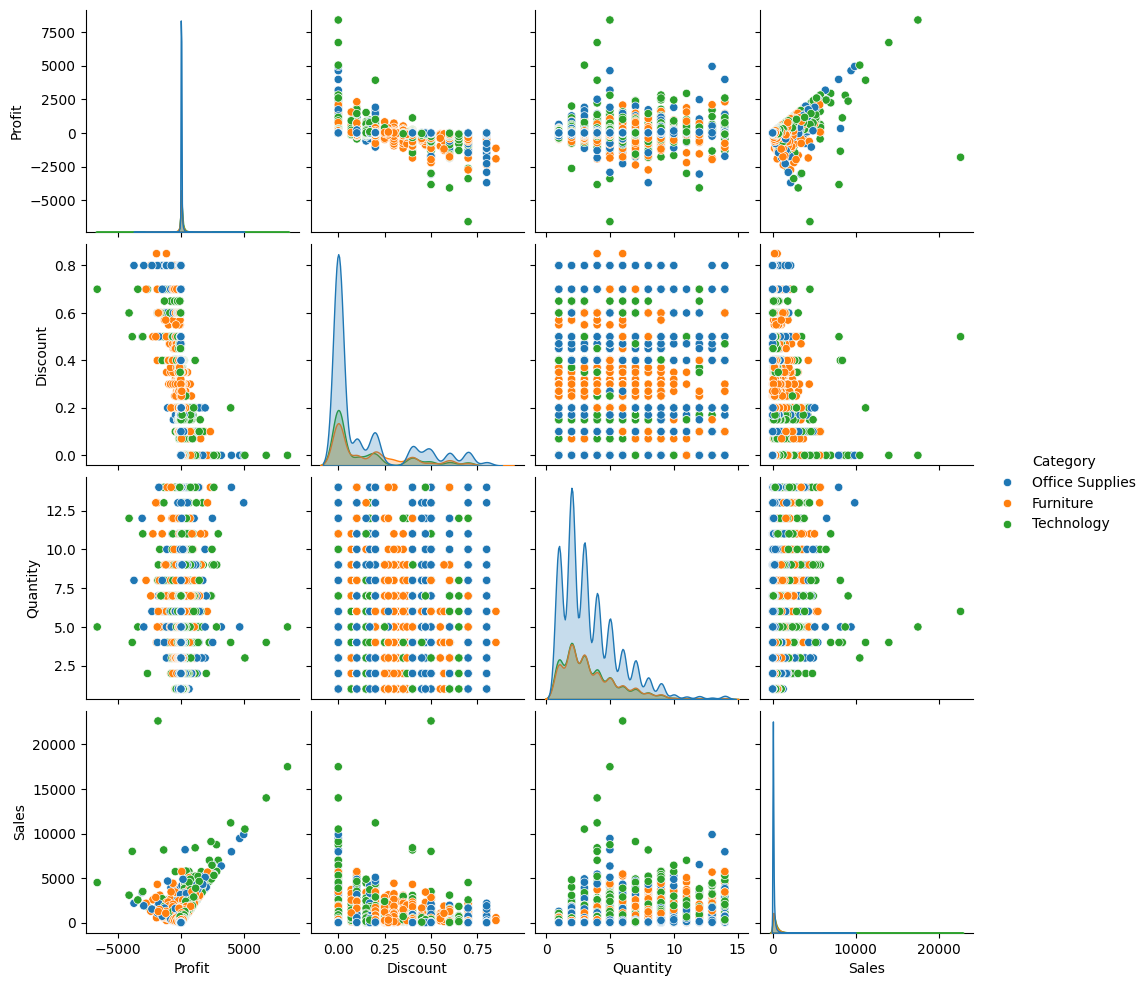

In [60]:
import seaborn as sns

# Assuming ACX_df is your DataFrame containing Profit, Discount, Quantity, Sales, and Category columns
# Replace 'Category' with the actual column name from your DataFrame if it's different
sns.pairplot(ACX_df, hue='Category', vars=['Profit', 'Discount', 'Quantity', 'Sales'])
plt.show()

### 2. Category and Sub-Category wise Total Quantity of Products

#### a. Category types

In [61]:
ACX_df["Category"].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

#### b. Sub -Category types

In [62]:
ACX_df["Sub-Category"].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Machines',
       'Appliances', 'Copiers', 'Chairs', 'Tables', 'Bookcases', 'Phones',
       'Accessories', 'Labels', 'Art', 'Envelopes', 'Fasteners',
       'Binders'], dtype=object)

#### c. Sub-Category vs Category

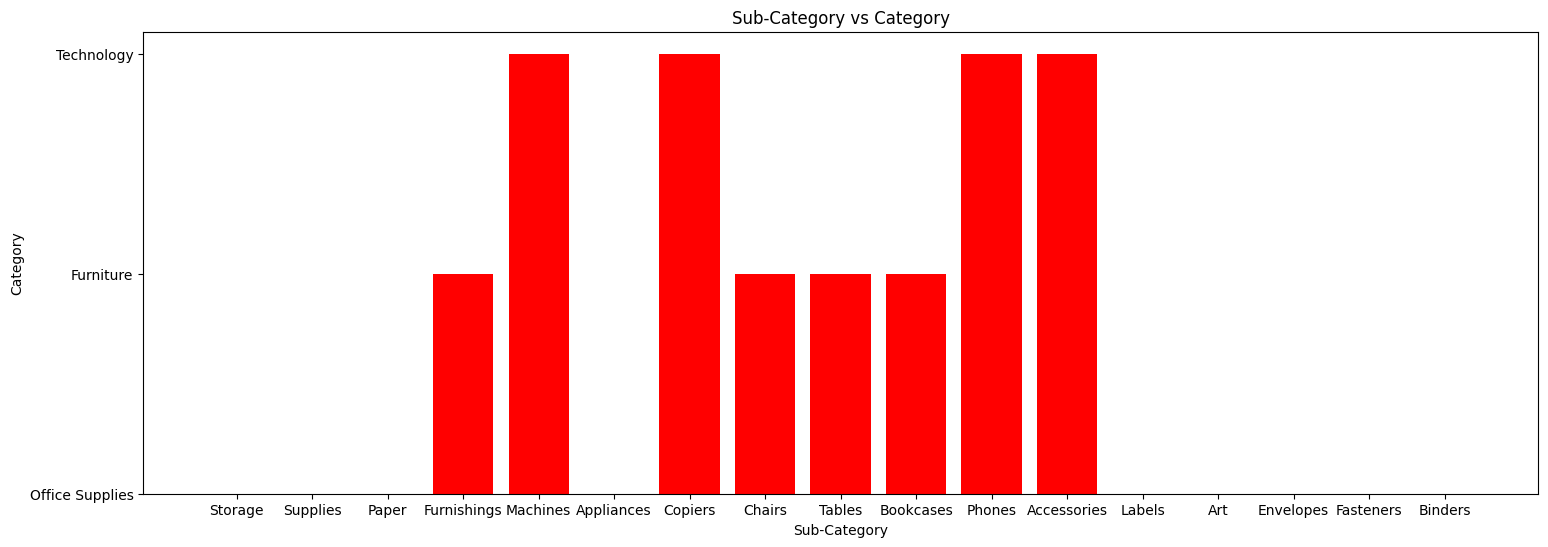

In [63]:
plt.figure(figsize=(18,6))
plt.bar('Sub-Category', 'Category', data=ACX_df, color='Red')
plt.title('Sub-Category vs Category')
plt.xlabel ('Sub-Category')
plt.ylabel ('Category')
plt.show()

#### d. Category wise Total Quantity in (pcs)

In [64]:
Category_Quantity = ACX_df.groupby('Category')['Quantity'].sum().reset_index()
Category_Quantity.index += 1
Category_Quantity.rename(columns={'Quantity': 'Total Quantity (pcs)'}, inplace=True)
print(tabulate(Category_Quantity, headers='keys', tablefmt='grid'))

+----+-----------------+------------------------+
|    | Category        |   Total Quantity (pcs) |
+====+=================+========================+
|  1 | Furniture       |                  34844 |
+----+-----------------+------------------------+
|  2 | Office Supplies |                 108139 |
+----+-----------------+------------------------+
|  3 | Technology      |                  35152 |
+----+-----------------+------------------------+


([0, 1, 2],
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

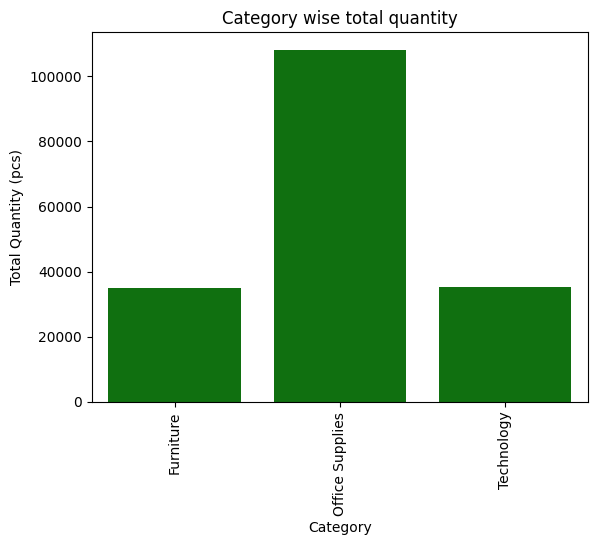

In [65]:
sns.barplot(x='Category',y='Total Quantity (pcs)',color='Green',data=Category_Quantity.reset_index())
plt.title('Category wise total quantity')
plt.xticks(rotation = 'vertical')

#### e. Category and Sub-Category wise Total Quantity in (pcs)

In [66]:
Category_Quantity = ACX_df.groupby('Category')['Quantity'].sum().reset_index()
Category_Quantity.index += 1
Category_Quantity.rename(columns={'Quantity': 'Total Quantity (pcs)'}, inplace=True)
print(tabulate(Category_Quantity, headers='keys', tablefmt='grid'))

SubCategory_Quantity = ACX_df.groupby(['Category', 'Sub-Category'])['Quantity'].sum().sort_values(ascending=False).reset_index()
SubCategory_Quantity.index += 1
SubCategory_Quantity.rename(columns={'Quantity': 'Quantity (pcs)'}, inplace=True)
print(tabulate(SubCategory_Quantity, headers='keys', tablefmt='grid'))

+----+-----------------+------------------------+
|    | Category        |   Total Quantity (pcs) |
+====+=================+========================+
|  1 | Furniture       |                  34844 |
+----+-----------------+------------------------+
|  2 | Office Supplies |                 108139 |
+----+-----------------+------------------------+
|  3 | Technology      |                  35152 |
+----+-----------------+------------------------+
+----+-----------------+----------------+------------------+
|    | Category        | Sub-Category   |   Quantity (pcs) |
+====+=================+================+==================+
|  1 | Office Supplies | Binders        |            21392 |
+----+-----------------+----------------+------------------+
|  2 | Office Supplies | Storage        |            16849 |
+----+-----------------+----------------+------------------+
|  3 | Office Supplies | Art            |            16190 |
+----+-----------------+----------------+------------------+
|

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Binders'),
  Text(1, 0, 'Storage'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Paper'),
  Text(4, 0, 'Chairs'),
  Text(5, 0, 'Phones'),
  Text(6, 0, 'Furnishings'),
  Text(7, 0, 'Accessories'),
  Text(8, 0, 'Labels'),
  Text(9, 0, 'Fasteners'),
  Text(10, 0, 'Supplies'),
  Text(11, 0, 'Bookcases'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Copiers'),
  Text(14, 0, 'Appliances'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Tables')])

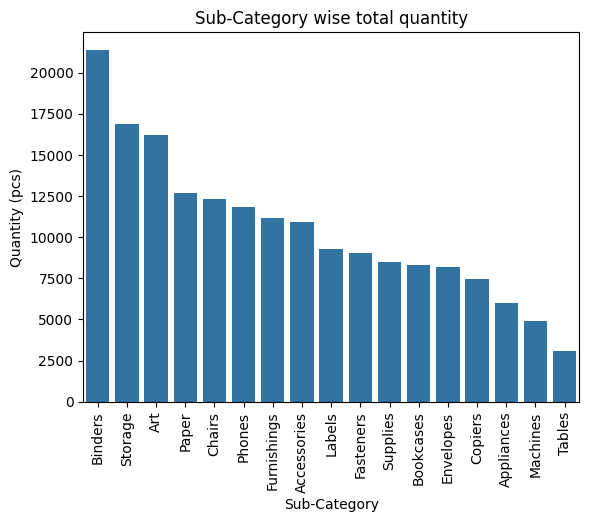

In [67]:
sns.barplot(x='Sub-Category',y='Quantity (pcs)',data=SubCategory_Quantity.reset_index())
plt.title('Sub-Category wise total quantity')
plt.xticks(rotation = 'vertical')

### 3. Category and Sub-Category wise Total Sales

+----+-----------------+---------------------+
|    | Category        | Total Sales (US$)   |
+====+=================+=====================+
|  1 | Technology      | $4741035            |
+----+-----------------+---------------------+
|  2 | Furniture       | $4105300            |
+----+-----------------+---------------------+
|  3 | Office Supplies | $3783634            |
+----+-----------------+---------------------+
+----+-----------------+----------------+---------------------+
|    | Category        | Sub-Category   | Total Sales (US$)   |
|----+-----------------+----------------+---------------------|
|  1 | Technology      | Phones         | $1706233            |
|  2 | Technology      | Copiers        | $1508862            |
|  3 | Furniture       | Chairs         | $1498826            |
|  4 | Furniture       | Bookcases      | $1465061            |
|  5 | Office Supplies | Storage        | $1124242            |
|  6 | Office Supplies | Appliances     | $1010145            |
|

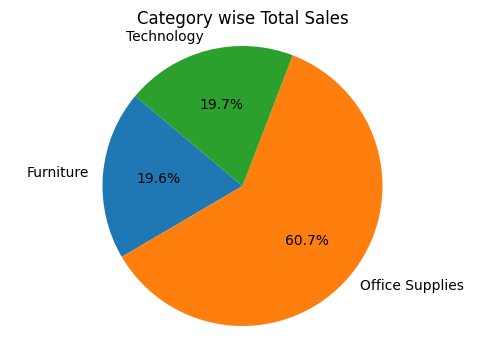

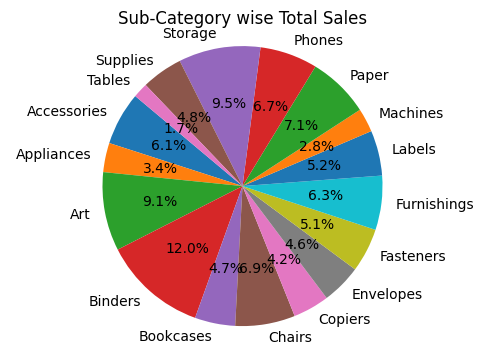

In [68]:
Category_Sales = ACX_df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
Category_Sales.index += 1
Category_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
Category_Sales['Sales'] = Category_Sales['Sales'].apply(lambda x: f'${int(x)}')
Category_Sales.rename(columns={'Sales': 'Total Sales (US$)'}, inplace=True)
print(tabulate(Category_Sales, headers='keys', tablefmt='grid'))

SubCategory_Sales = ACX_df.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values(ascending=False).reset_index()
SubCategory_Sales.index += 1
SubCategory_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
SubCategory_Sales['Sales'] = SubCategory_Sales['Sales'].apply(lambda x: f'${int(x)}')
SubCategory_Sales.rename(columns={'Sales': 'Total Sales (US$)'}, inplace=True)
print(tabulate(SubCategory_Sales, headers='keys', tablefmt='psql'))

Category_Sales = ACX_df.groupby('Category')['Quantity'].sum()
plt.figure(figsize=(6,4))
plt.pie(Category_Sales, labels=Category_Sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Category wise Total Sales')
plt.axis('equal')
plt.show()

SubCategory_Sales = ACX_df.groupby('Sub-Category')['Quantity'].sum()
plt.figure(figsize=(6,4))
plt.pie(SubCategory_Sales, labels=SubCategory_Sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sub-Category wise Total Sales')
plt.axis('equal')
plt.show()

### 4. Category, Sub-Category and Product wise Total Sales

In [69]:
Category_SubCategory_Product_Sales = ACX_df.groupby(['Category', 'Sub-Category', 'Product Name'])['Sales'].sum().sort_values(ascending=False).reset_index()
Category_SubCategory_Product_Sales.index += 1
Category_SubCategory_Product_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
Category_SubCategory_Product_Sales['Sales'] = Category_SubCategory_Product_Sales['Sales'].apply(lambda x: f'${int(x)}')
Category_SubCategory_Product_Sales.rename(columns={'Sales': 'Total Sales (US$)'}, inplace=True)
print(tabulate(Category_SubCategory_Product_Sales, headers='keys', tablefmt='psql'))

+------+-----------------+----------------+---------------------------------------------------------------------------------------------------------------------------------+---------------------+
|      | Category        | Sub-Category   | Product Name                                                                                                                    | Total Sales (US$)   |
|------+-----------------+----------------+---------------------------------------------------------------------------------------------------------------------------------+---------------------|
|    1 | Technology      | Phones         | Apple Smart Phone, Full Size                                                                                                    | $86935              |
|    2 | Technology      | Phones         | Cisco Smart Phone, Full Size                                                                                                    | $76441              |
|    3 | Technology 

### 5. Category and Sub-Category wise Average Sales

In [70]:
Category_AvgSales = ACX_df.groupby('Category')['Sales'].mean().sort_values(ascending=False).reset_index()
Category_AvgSales.index += 1
Category_AvgSales.sort_values(by=['Sales'], inplace=True, ascending=False)
Category_AvgSales['Sales'] = Category_AvgSales['Sales'].apply(lambda x: f'US${int(x)}')
Category_AvgSales.rename(columns={'Sales': 'Average Sales ($)'}, inplace=True)
print(tabulate(Category_AvgSales, headers='keys', tablefmt='grid'))

SubCategory_AvgSales = ACX_df.groupby(['Category','Sub-Category'])['Sales'].mean().sort_values(ascending=False).reset_index()
SubCategory_AvgSales.index += 1
SubCategory_AvgSales.sort_values(by=['Sales'], inplace=True, ascending=False)
SubCategory_AvgSales['Sales'] = SubCategory_AvgSales['Sales'].apply(lambda x: f'US${int(x)}')
SubCategory_AvgSales.rename(columns={'Sales': 'Average Sales ($)'}, inplace=True)
print(tabulate(SubCategory_AvgSales, headers='keys', tablefmt='psql'))


+----+-----------------+---------------------+
|    | Category        | Average Sales ($)   |
+====+=================+=====================+
|  1 | Technology      | US$467              |
+----+-----------------+---------------------+
|  2 | Furniture       | US$416              |
+----+-----------------+---------------------+
|  3 | Office Supplies | US$121              |
+----+-----------------+---------------------+
+----+-----------------+----------------+---------------------+
|    | Category        | Sub-Category   | Average Sales ($)   |
|----+-----------------+----------------+---------------------|
|  1 | Furniture       | Tables         | US$879              |
|  2 | Technology      | Copiers        | US$679              |
|  3 | Furniture       | Bookcases      | US$608              |
|  4 | Office Supplies | Appliances     | US$580              |
|  5 | Technology      | Machines       | US$525              |
|  6 | Technology      | Phones         | US$508              |
|

### 6. Category, Sub-Category and Product wise Average Sales

In [71]:
Category_SubCategory_Product_AvgSales = ACX_df.groupby(['Category', 'Sub-Category', 'Product Name'])['Sales'].mean().sort_values(ascending=False).reset_index()
Category_SubCategory_Product_AvgSales.index += 1
Category_SubCategory_Product_AvgSales.sort_values(by=['Sales'], inplace=True, ascending=False)
Category_SubCategory_Product_AvgSales['Sales'] = Category_SubCategory_Product_AvgSales['Sales'].apply(lambda x: f'US${int(x)}')
Category_SubCategory_Product_AvgSales.rename(columns={'Sales': 'Average Sales ($)'}, inplace=True)
print(tabulate(Category_SubCategory_Product_AvgSales, headers='keys', tablefmt='psql'))

+------+-----------------+----------------+---------------------------------------------------------------------------------------------------------------------------------+---------------------+
|      | Category        | Sub-Category   | Product Name                                                                                                                    | Average Sales ($)   |
|------+-----------------+----------------+---------------------------------------------------------------------------------------------------------------------------------+---------------------|
|    1 | Technology      | Machines       | Cisco TelePresence System EX90 Videoconferencing Unit                                                                           | US$22638            |
|    2 | Technology      | Copiers        | Canon imageCLASS 2200 Advanced Copier                                                                                           | US$12319            |
|    3 | Technology 

#### 7. Segment wise Sales by Category

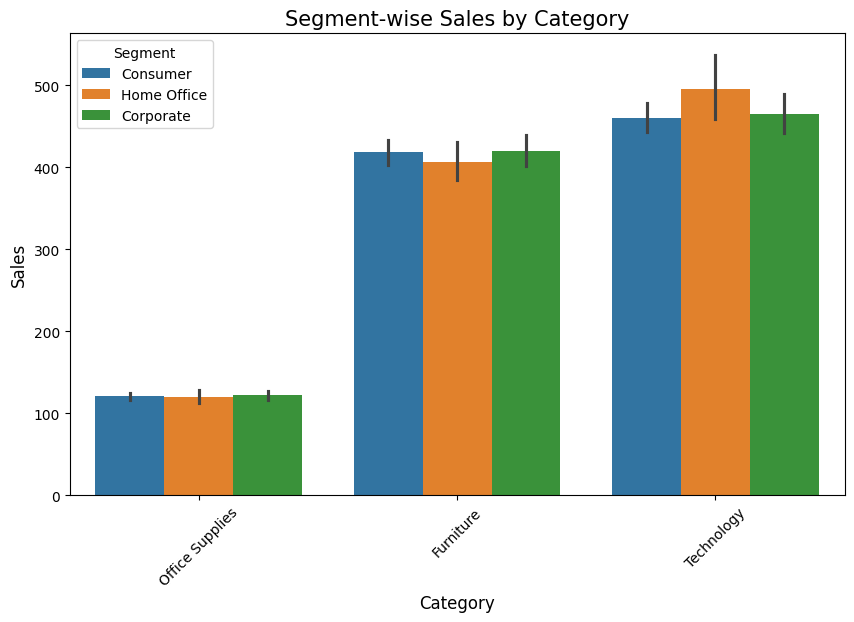

In [72]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', hue='Segment', data=ACX_df)
plt.title('Segment-wise Sales by Category', fontsize=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()

### 8. Top 15 Category, Sub-Category, and Product wise Profits

In [73]:
TopSubCategory_products_profits = ACX_df.groupby(['Category', 'Sub-Category', 'Product Name'])['Profit'].sum().sort_values(ascending=False).reset_index()
TopSubCategory_products_profits.sort_values(by=['Profit'], inplace=True, ascending=False)
TopSubCategory_products_profits['Profit'] = TopSubCategory_products_profits['Profit'].apply(lambda x: f'${int(x)}')
TopSubCategory_products_profits.index += 1
TopSubCategory_products_profits.head(15)

,Category,Sub-Category,Product Name,Profit
1,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,$25199
2,Technology,Phones,"Cisco Smart Phone, Full Size",$17238
3,Technology,Phones,"Motorola Smart Phone, Full Size",$17027
4,Office Supplies,Appliances,"Hoover Stove, Red",$11807
5,Furniture,Bookcases,"Sauder Classic Bookcase, Traditional",$10672
6,Furniture,Chairs,"Harbour Creations Executive Leather Armchair, ...",$10427
7,Technology,Phones,"Nokia Smart Phone, Full Size",$9938
8,Technology,Phones,"Cisco Smart Phone, with Caller ID",$9786
9,Technology,Phones,"Nokia Smart Phone, with Caller ID",$9465
10,Technology,Accessories,"Belkin Router, USB",$8955


#### a. Top 15 Category-wise Profit

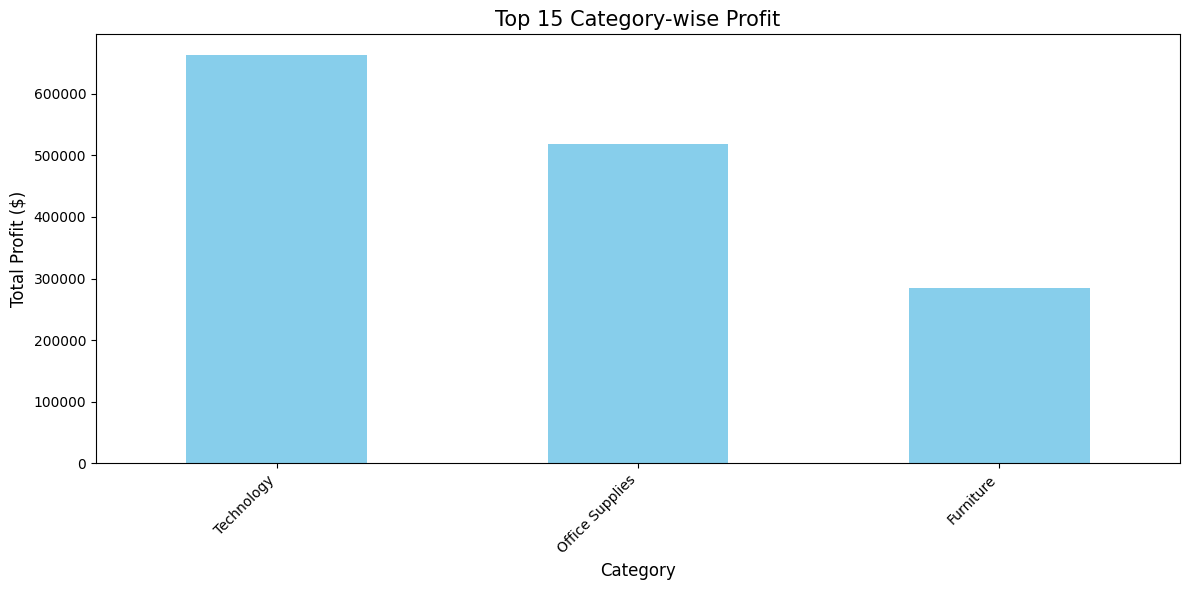

In [74]:
# Calculate total profit for each category
category_profits = ACX_df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

# Select top 15 categories by profit
top_15_category_profits = category_profits.head(15)

# Plot bar graph
plt.figure(figsize=(12, 6))
top_15_category_profits.plot(kind='bar', color='skyblue')
plt.title('Top 15 Category-wise Profit', fontsize=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### b. Top 15 Category and Sub-Category wise Profits

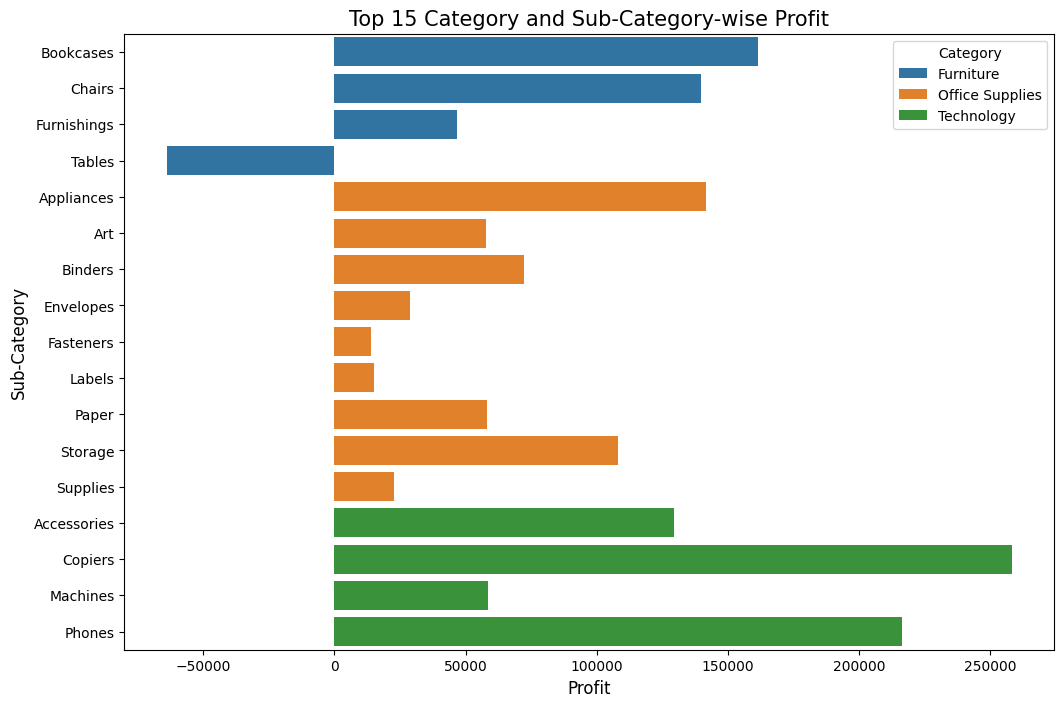

In [75]:

# Aggregate profit for each category and sub-category
category_subcategory_profit = ACX_df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Find the top 15 categories with the highest profit
top_15_categories = category_subcategory_profit.groupby('Category')['Profit'].sum().nlargest(15).index

# Filter the data to include only the top 15 categories
top_15_data = category_subcategory_profit[category_subcategory_profit['Category'].isin(top_15_categories)]

# Plot the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Profit', y='Sub-Category', hue='Category', data=top_15_data)
plt.title('Top 15 Category and Sub-Category-wise Profit', fontsize=15)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.legend(title='Category', loc='upper right')
plt.show()

#### c. Top 15 Product wise Profits

/var/folders/_3/b3lbcghd6t732qc41_rrlm9c0000gn/T/ipykernel_5766/4128602281.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_products.values, y=top_15_products.index, palette='viridis')


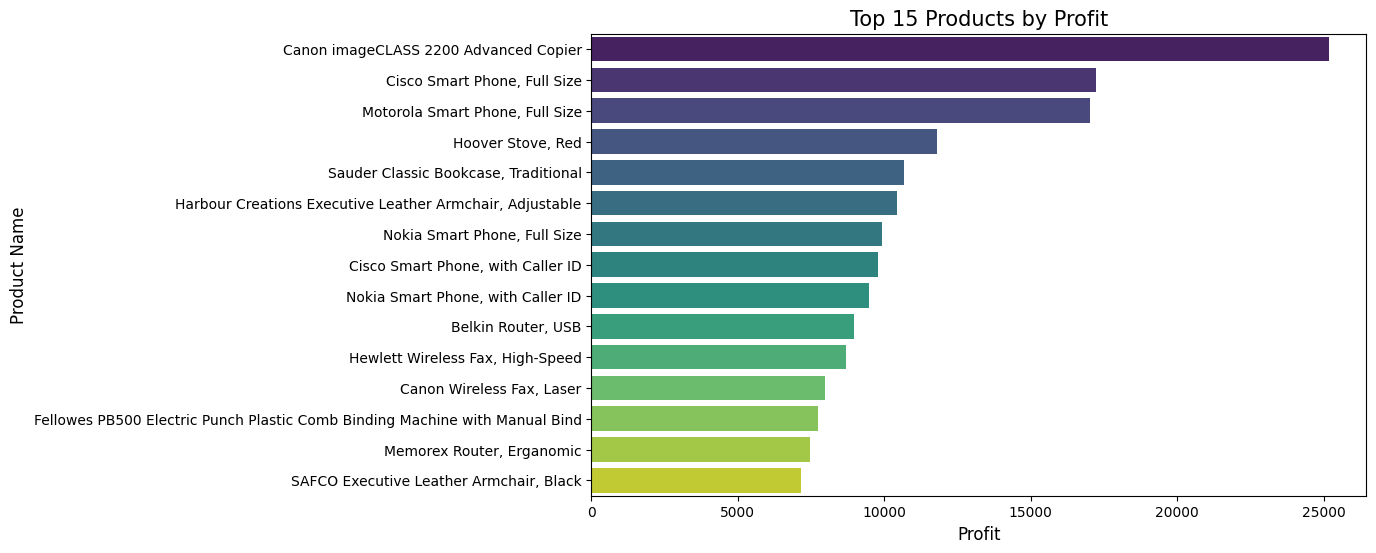

In [76]:
Product_TopProfit = ACX_df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).reset_index()
Product_TopProfit.sort_values(by=['Profit'], inplace=True, ascending=False)
Product_TopProfit['Profit'] = Product_TopProfit['Profit'].apply(lambda x: f'${int(x)}')
Product_TopProfit.index += 1
Product_TopProfit.head(15)

# Aggregate profit for each product
product_profit = ACX_df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)

# Select top 15 products by profit
top_15_products = product_profit.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_products.values, y=top_15_products.index, palette='viridis')
plt.title('Top 15 Products by Profit', fontsize=15)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

### 9. Category and Country wise Profit

In [77]:
country_profits = ACX_df.groupby(['Category', 'Country',])['Profit'].sum().sort_values(ascending=False).reset_index()
country_profits.sort_values(by=['Profit'], inplace=True, ascending=False)
country_profits['Profit'] = country_profits['Profit'].apply(lambda x: f'${int(x)}')
country_profits.index += 1
print(tabulate(country_profits, headers='keys', tablefmt='psql'))

+-----+-----------------+----------------------------------+----------+
|     | Category        | Country                          | Profit   |
|-----+-----------------+----------------------------------+----------|
|   1 | Technology      | United States                    | $145453  |
|   2 | Office Supplies | United States                    | $122624  |
|   3 | Technology      | China                            | $64845   |
|   4 | Technology      | India                            | $56092   |
|   5 | Office Supplies | France                           | $53658   |
|   6 | Technology      | Mexico                           | $53580   |
|   7 | Technology      | Germany                          | $50788   |
|   8 | Technology      | United Kingdom                   | $49476   |
|   9 | Technology      | Australia                        | $47766   |
|  10 | Furniture       | China                            | $46114   |
|  11 | Furniture       | India                            | $42

#### a. Top 10 Countries by Profit 

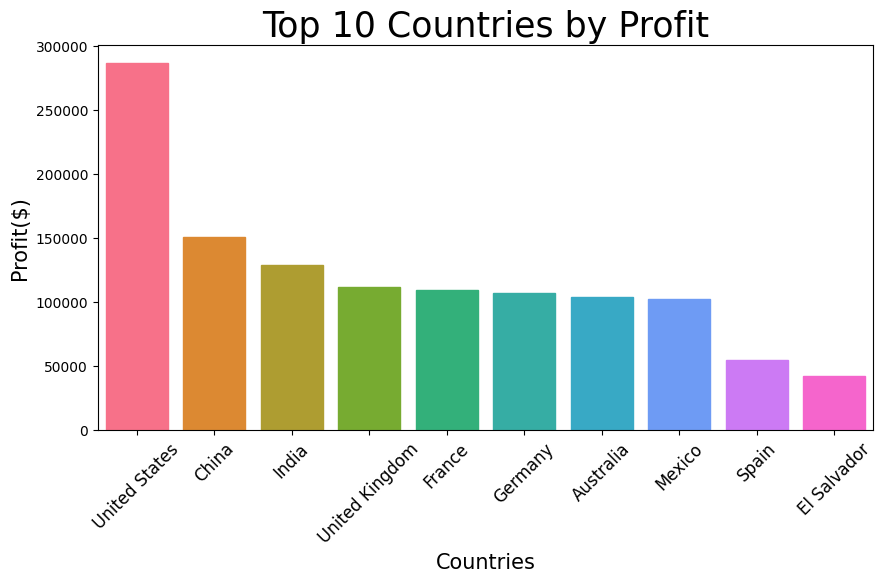

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
country_profits = ACX_df.groupby('Country')['Profit'].sum().sort_values(ascending=False)[:10]  # Select top 10 Countries by profit
barplot = sns.barplot(x=country_profits.index, y=country_profits.values)

# Set different colors for each bar
colors = sns.color_palette("husl", len(country_profits))
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i])

plt.title('Top 10 Countries by Profit', fontsize=25)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Profit($)', fontsize=15)
plt.show()

#### b. Bottom 10 Countries by Profit

/var/folders/_3/b3lbcghd6t732qc41_rrlm9c0000gn/T/ipykernel_5766/3671026267.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_profits.index, y=country_profits.values, palette=colors)


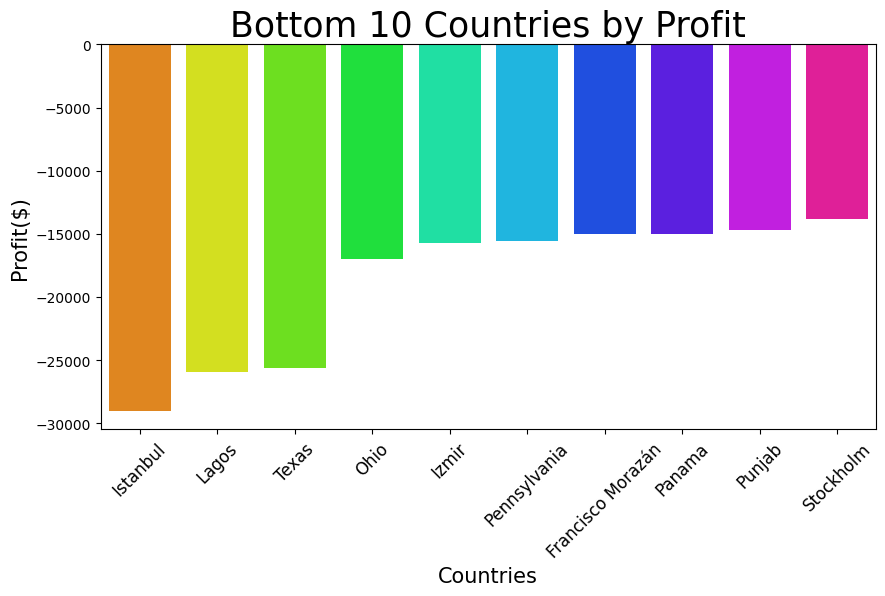

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
country_profits = ACX_df.groupby('State')['Profit'].sum().sort_values()[:10]  # Select bottom 10 states by profit

# Generate a list of colors
colors = sns.color_palette("hsv", len(country_profits))

# Plot the bar graph with different colors for each bar
sns.barplot(x=country_profits.index, y=country_profits.values, palette=colors)

plt.title('Bottom 10 Countries by Profit', fontsize=25)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Profit($)', fontsize=15)
plt.show()

### 10. Top 10 Category and Product wise Profits of 4 years in Technology Category

In [80]:
from tabulate import tabulate

# Convert 'Order Date' to datetime format with correct format
ACX_df['Order Date'] = pd.to_datetime(ACX_df['Order Date'], format='%d-%m-%Y')

# Filter the DataFrame for 'Technology' category
technology_sales = ACX_df[ACX_df['Category'] == 'Technology']

# Extract the year from the order date
technology_sales['Year'] = technology_sales['Order Date'].dt.year

# Group the data by year
grouped_technology_sales = technology_sales.groupby('Year')

# Iterate over each group (year) and find the top profit products
for year, group_data in grouped_technology_sales:
    # Find the top profit products for the current year
    top_profit_products = group_data.sort_values(by='Profit', ascending=False).head(10)
    
    # Convert profit values to dollars format
    top_profit_products['Profit'] = top_profit_products['Profit'].apply(lambda x: f'${x:.2f}')
    
    # Display the results for the current year
    print(f"Top profit products in the Technology category for the Year {year}:")
    print(tabulate(top_profit_products[['Category', 'Product Name', 'Profit']], headers='keys', tablefmt='grid'))
    print("\n")



Top profit products in the Technology category for the Year 2019:
+------+------------+-----------------------------------------------------------------------+----------+
|      | Category   | Product Name                                                          | Profit   |
+======+============+=======================================================================+==========+
|  548 | Technology | Samsung Smart Phone, VoIP                                             | $2939.31 |
+------+------------+-----------------------------------------------------------------------+----------+
| 8198 | Technology | HP Designjet T520 Inkjet Large Format Printer - 24" Color             | $2239.99 |
+------+------------+-----------------------------------------------------------------------+----------+
| 6764 | Technology | Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier | $1995.99 |
+------+------------+-----------------------------------------------------------------------+-

#### a. Yearly Total, Maximum and Minimum Profits in Technology Category

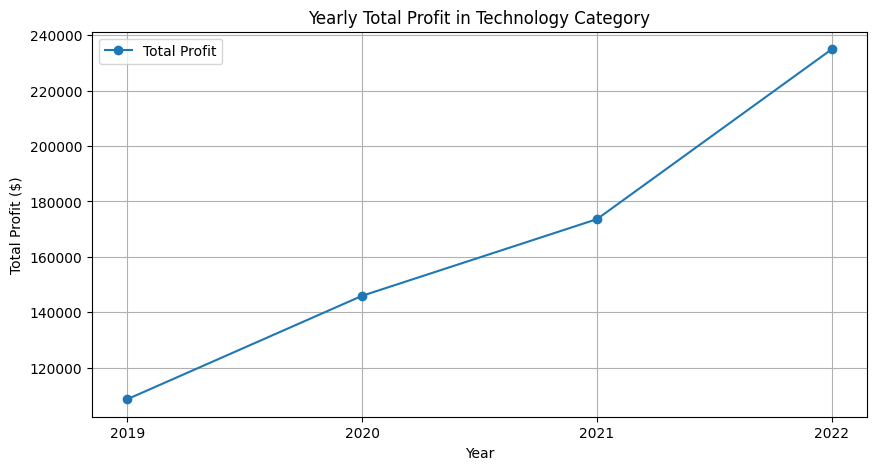

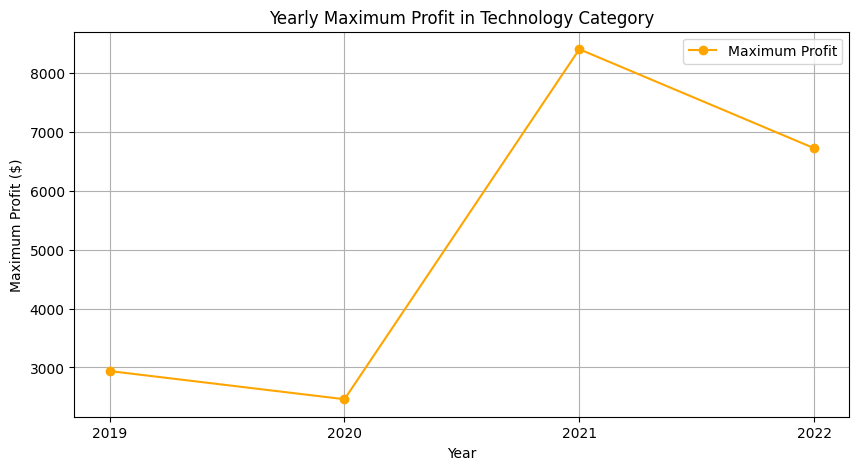

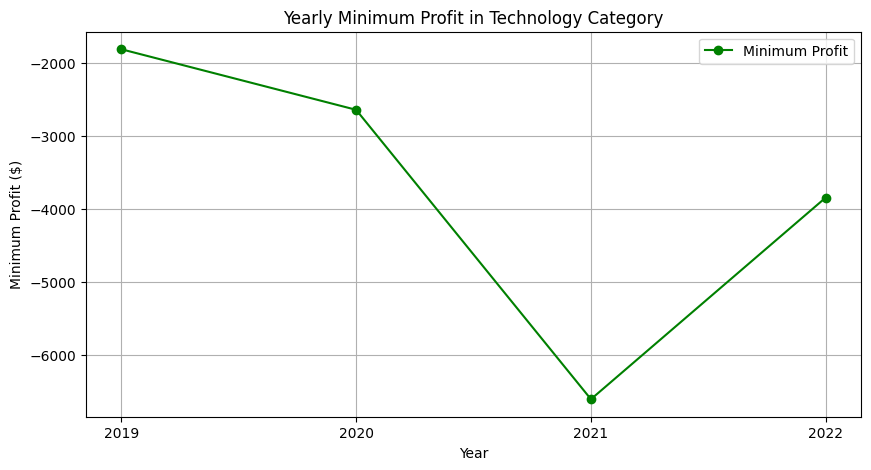

In [81]:
import matplotlib.pyplot as plt

# Aggregate total profit, maximum profit, and minimum profit for each year
yearly_total_profit = grouped_technology_sales['Profit'].sum()
yearly_max_profit = grouped_technology_sales['Profit'].max()
yearly_min_profit = grouped_technology_sales['Profit'].min()

# Plot consolidated year-wise total profit
plt.figure(figsize=(10, 5))
plt.plot(yearly_total_profit.index, yearly_total_profit.values, marker='o', linestyle='-', label='Total Profit')
plt.title('Yearly Total Profit in Technology Category')
plt.xlabel('Year')
plt.ylabel('Total Profit ($)')
plt.xticks(yearly_total_profit.index)
plt.legend()
plt.grid(True)
plt.show()

# Plot consolidated year-wise maximum profit
plt.figure(figsize=(10, 5))
plt.plot(yearly_max_profit.index, yearly_max_profit.values, marker='o', linestyle='-', color='orange', label='Maximum Profit')
plt.title('Yearly Maximum Profit in Technology Category')
plt.xlabel('Year')
plt.ylabel('Maximum Profit ($)')
plt.xticks(yearly_max_profit.index)
plt.legend()
plt.grid(True)
plt.show()

# Plot consolidated year-wise minimum profit
plt.figure(figsize=(10, 5))
plt.plot(yearly_min_profit.index, yearly_min_profit.values, marker='o', linestyle='-', color='green', label='Minimum Profit')
plt.title('Yearly Minimum Profit in Technology Category')
plt.xlabel('Year')
plt.ylabel('Minimum Profit ($)')
plt.xticks(yearly_min_profit.index)
plt.legend()
plt.grid(True)
plt.show()




#### b. Yearly Profit Analysis Total, Maximum and Minimum Profits in Technology Category

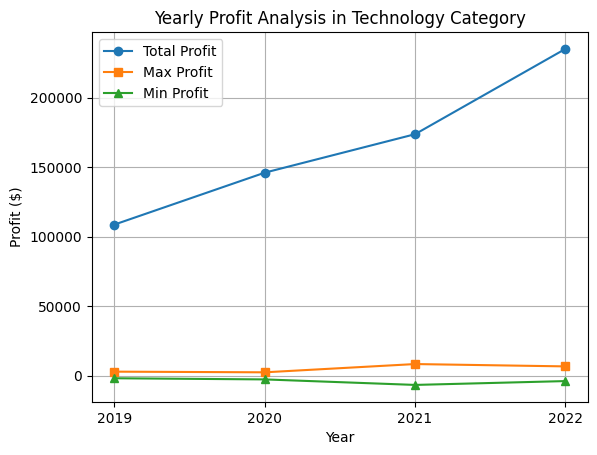

In [82]:
import matplotlib.pyplot as plt

# Aggregate total profit, maximum profit, and minimum profit for each year
yearly_total_profit = grouped_technology_sales['Profit'].sum()
yearly_max_profit = grouped_technology_sales['Profit'].max()
yearly_min_profit = grouped_technology_sales['Profit'].min()

# Plot consolidated line graphs
plt.plot(yearly_total_profit.index, yearly_total_profit.values, marker='o', linestyle='-', label='Total Profit')
plt.plot(yearly_max_profit.index, yearly_max_profit.values, marker='s', linestyle='-', label='Max Profit')
plt.plot(yearly_min_profit.index, yearly_min_profit.values, marker='^', linestyle='-', label='Min Profit')

# Add labels and title
plt.title('Yearly Profit Analysis in Technology Category')
plt.xlabel('Year')
plt.ylabel('Profit ($)')
plt.xticks(yearly_total_profit.index)
plt.legend()
plt.grid(True)
plt.show()


#### c. Segment-wise Profit in Technology Category

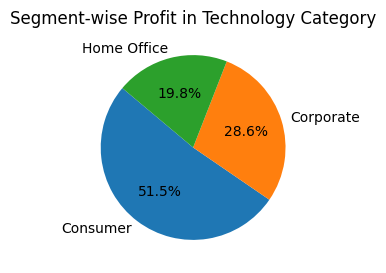

In [83]:
# Filter the data for the Technology category
technology_data = ACX_df[ACX_df['Category'] == 'Technology']

# Group the filtered data by segment and calculate total profit for each segment
segment_wise_profit = technology_data.groupby('Segment')['Profit'].sum()

# Plot the pie chart
plt.figure(figsize=(3, 3))
plt.pie(segment_wise_profit, labels=segment_wise_profit.index, autopct='%1.1f%%', startangle=140)
plt.title('Segment-wise Profit in Technology Category')
plt.show()

### 11. Top 10 Category and Product wise Profits of 4 years in Furniture Category

In [84]:
from tabulate import tabulate

# Convert 'Order Date' to datetime format with correct format
ACX_df['Order Date'] = pd.to_datetime(ACX_df['Order Date'], format='%d-%m-%Y')

# Filter the DataFrame for 'Furniture' category
furniture_sales = ACX_df[ACX_df['Category'] == 'Furniture']

# Extract the year from the order date
furniture_sales['Year'] = furniture_sales['Order Date'].dt.year

# Group the data by year
grouped_furniture_sales = furniture_sales.groupby('Year')

# Iterate over each group (year) and find the top profit products
for year, group_data in grouped_furniture_sales:
    # Find the top profit products for the current year
    top_profit_products = group_data.sort_values(by='Profit', ascending=False).head(10)
    
    # Convert profit values to dollars format
    top_profit_products['Profit'] = top_profit_products['Profit'].apply(lambda x: f'${x:.2f}')
    
    # Display the results for the current year
    print(f"Top profit products in the Furniture category for the Year {year}:")
    print(tabulate(top_profit_products[['Category', 'Product Name', 'Profit']], headers='keys', tablefmt='grid'))
    print("\n")

Top profit products in the Furniture category for the Year 2019:
+------+------------+---------------------------------------------------+----------+
|      | Category   | Product Name                                      | Profit   |
+======+============+===================================================+==========+
|  645 | Furniture  | SAFCO Executive Leather Armchair, Black           | $1868.13 |
+------+------------+---------------------------------------------------+----------+
| 3282 | Furniture  | Bush Classic Bookcase, Pine                       | $1622.88 |
+------+------------+---------------------------------------------------+----------+
|  962 | Furniture  | Office Star Executive Leather Armchair, Black     | $1537.83 |
+------+------------+---------------------------------------------------+----------+
| 8640 | Furniture  | Chromcraft Computer Table, Adjustable Height      | $1528.38 |
+------+------------+---------------------------------------------------+----------+


#### a. Yearly Total, Maximum and Minimum Profits in Furniture Category

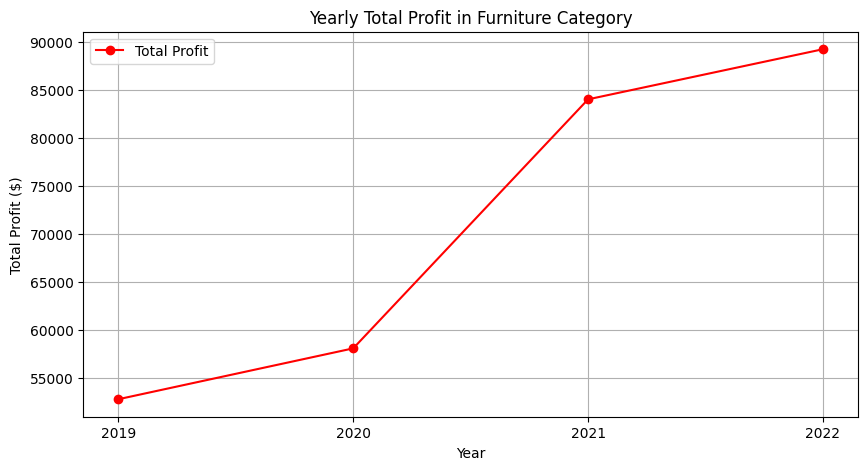

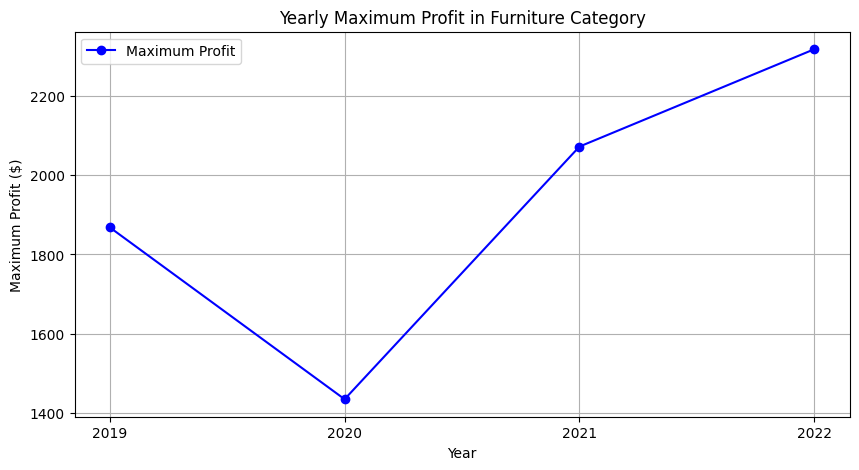

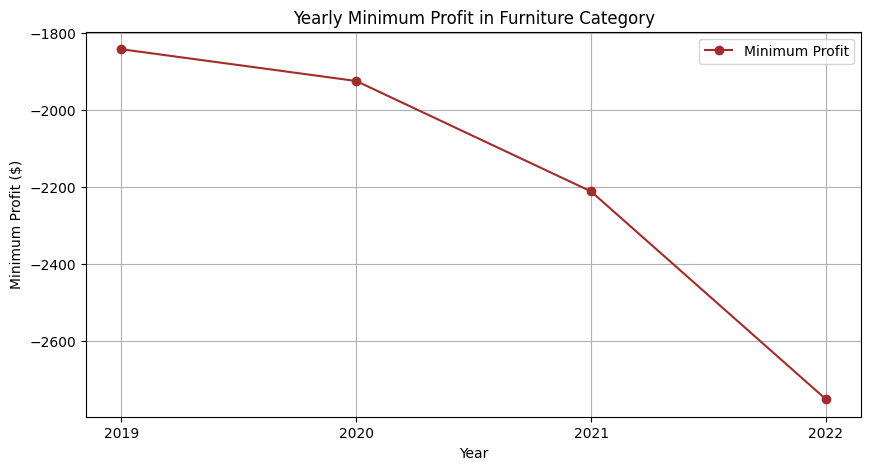

In [85]:
import matplotlib.pyplot as plt

# Aggregate total profit, maximum profit, and minimum profit for each year
yearly_total_profit = grouped_furniture_sales['Profit'].sum()
yearly_max_profit = grouped_furniture_sales['Profit'].max()
yearly_min_profit = grouped_furniture_sales['Profit'].min()

# Plot consolidated year-wise total profit
plt.figure(figsize=(10, 5))
plt.plot(yearly_total_profit.index, yearly_total_profit.values, marker='o', linestyle='-', color='red', label='Total Profit')
plt.title('Yearly Total Profit in Furniture Category')
plt.xlabel('Year')
plt.ylabel('Total Profit ($)')
plt.xticks(yearly_total_profit.index)
plt.legend()
plt.grid(True)
plt.show()

# Plot consolidated year-wise maximum profit
plt.figure(figsize=(10, 5))
plt.plot(yearly_max_profit.index, yearly_max_profit.values, marker='o', linestyle='-', color='blue', label='Maximum Profit')
plt.title('Yearly Maximum Profit in Furniture Category')
plt.xlabel('Year')
plt.ylabel('Maximum Profit ($)')
plt.xticks(yearly_max_profit.index)
plt.legend()
plt.grid(True)
plt.show()

# Plot consolidated year-wise minimum profit
plt.figure(figsize=(10, 5))
plt.plot(yearly_min_profit.index, yearly_min_profit.values, marker='o', linestyle='-', color='brown', label='Minimum Profit')
plt.title('Yearly Minimum Profit in Furniture Category')
plt.xlabel('Year')
plt.ylabel('Minimum Profit ($)')
plt.xticks(yearly_min_profit.index)
plt.legend()
plt.grid(True)
plt.show()


#### b. Yearly Profit Analysis Total, Maximum and Minimum Profits in Furniture Category

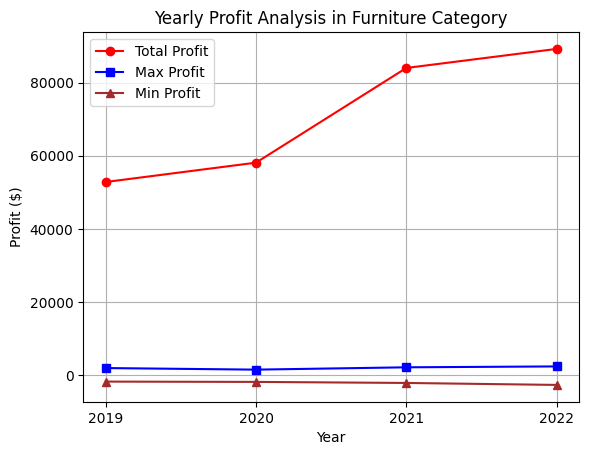

In [86]:
import matplotlib.pyplot as plt

# Aggregate total profit, maximum profit, and minimum profit for each year
yearly_total_profit = grouped_furniture_sales['Profit'].sum()
yearly_max_profit = grouped_furniture_sales['Profit'].max()
yearly_min_profit = grouped_furniture_sales['Profit'].min()

# Plot consolidated line graphs
plt.plot(yearly_total_profit.index, yearly_total_profit.values, marker='o', linestyle='-', color='red', label='Total Profit')
plt.plot(yearly_max_profit.index, yearly_max_profit.values, marker='s', linestyle='-', color='blue', label='Max Profit')
plt.plot(yearly_min_profit.index, yearly_min_profit.values, marker='^', linestyle='-', color='brown', label='Min Profit')

# Add labels and title
plt.title('Yearly Profit Analysis in Furniture Category')
plt.xlabel('Year')
plt.ylabel('Profit ($)')
plt.xticks(yearly_total_profit.index)
plt.legend()
plt.grid(True)
plt.show()


#### c. Segment-wise Profit in Furniture Category

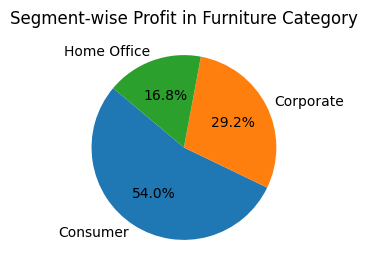

In [87]:
# Filter the data for the Technology category
technology_data = ACX_df[ACX_df['Category'] == 'Furniture']

# Group the filtered data by segment and calculate total profit for each segment
segment_wise_profit = technology_data.groupby('Segment')['Profit'].sum()

# Plot the pie chart
plt.figure(figsize=(3, 3))
plt.pie(segment_wise_profit, labels=segment_wise_profit.index, autopct='%1.1f%%', startangle=140)
plt.title('Segment-wise Profit in Furniture Category')
plt.show()

### 12. Top 10 Category and Product wise Profits of 4 years in Furniture Category

In [88]:
from tabulate import tabulate

# Convert 'Order Date' to datetime format with correct format
ACX_df['Order Date'] = pd.to_datetime(ACX_df['Order Date'], format='%d-%m-%Y')

# Filter the DataFrame for 'Furniture' category
office_supplies_sales = ACX_df[ACX_df['Category'] == 'Office Supplies']

# Extract the year from the order date
office_supplies_sales['Year'] = office_supplies_sales['Order Date'].dt.year

# Group the data by year
grouped_office_supplies_sales = office_supplies_sales.groupby('Year')

# Iterate over each group (year) and find the top profit products
for year, group_data in grouped_office_supplies_sales:
    # Find the top profit products for the current year
    top_profit_products = group_data.sort_values(by='Profit', ascending=False).head(10)
    
    # Convert profit values to dollars format
    top_profit_products['Profit'] = top_profit_products['Profit'].apply(lambda x: f'${x:.2f}')
    
    # Display the results for the current year
    print(f"Top profit products in the Office Supplies category for the Year {year}:")
    print(tabulate(top_profit_products[['Category', 'Product Name', 'Profit']], headers='keys', tablefmt='grid'))
    print("\n")


Top profit products in the Office Supplies category for the Year 2019:
+------+-----------------+---------------------------------------------+----------+
|      | Category        | Product Name                                | Profit   |
+======+=================+=============================================+==========+
| 5512 | Office Supplies | Ibico EPK-21 Electric Binding System        | $4630.48 |
+------+-----------------+---------------------------------------------+----------+
| 4930 | Office Supplies | Hamilton Beach Stove, Silver                | $2476.44 |
+------+-----------------+---------------------------------------------+----------+
| 2619 | Office Supplies | KitchenAid Stove, Silver                    | $1644.03 |
+------+-----------------+---------------------------------------------+----------+
|  971 | Office Supplies | Hoover Stove, Red                           | $1364.24 |
+------+-----------------+---------------------------------------------+----------+
| 225

#### a. Yearly Total, Maximum and Minimum Profits in Office Supplies Category

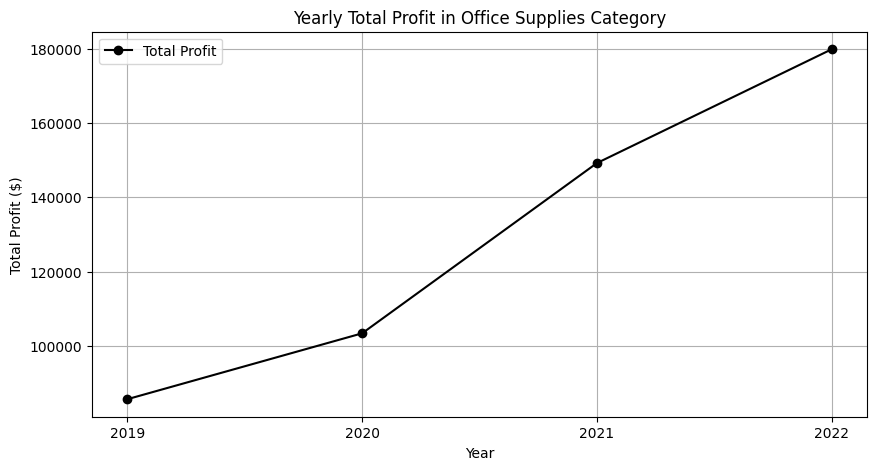

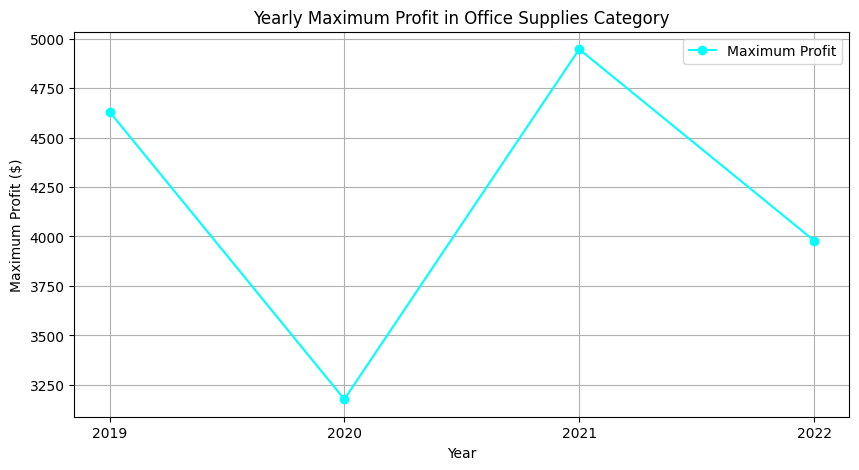

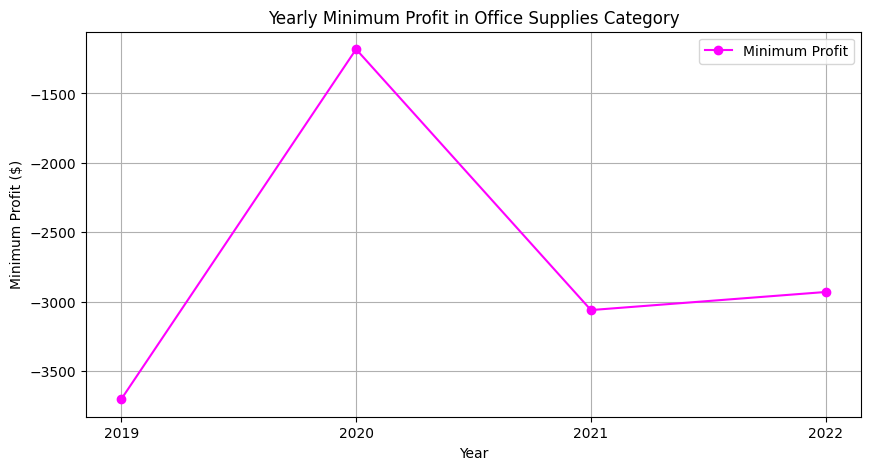

In [89]:
import matplotlib.pyplot as plt

# Aggregate total profit, maximum profit, and minimum profit for each year
yearly_total_profit = grouped_office_supplies_sales['Profit'].sum()
yearly_max_profit = grouped_office_supplies_sales['Profit'].max()
yearly_min_profit = grouped_office_supplies_sales['Profit'].min()

# Plot consolidated year-wise total profit
plt.figure(figsize=(10, 5))
plt.plot(yearly_total_profit.index, yearly_total_profit.values, marker='o', linestyle='-', color='black', label='Total Profit')
plt.title('Yearly Total Profit in Office Supplies Category')
plt.xlabel('Year')
plt.ylabel('Total Profit ($)')
plt.xticks(yearly_total_profit.index)
plt.legend()
plt.grid(True)
plt.show()

# Plot consolidated year-wise maximum profit
plt.figure(figsize=(10, 5))
plt.plot(yearly_max_profit.index, yearly_max_profit.values, marker='o', linestyle='-', color='cyan', label='Maximum Profit')
plt.title('Yearly Maximum Profit in Office Supplies Category')
plt.xlabel('Year')
plt.ylabel('Maximum Profit ($)')
plt.xticks(yearly_max_profit.index)
plt.legend()
plt.grid(True)
plt.show()

# Plot consolidated year-wise minimum profit
plt.figure(figsize=(10, 5))
plt.plot(yearly_min_profit.index, yearly_min_profit.values, marker='o', linestyle='-', color='magenta', label='Minimum Profit')
plt.title('Yearly Minimum Profit in Office Supplies Category')
plt.xlabel('Year')
plt.ylabel('Minimum Profit ($)')
plt.xticks(yearly_min_profit.index)
plt.legend()
plt.grid(True)
plt.show()

#### b. Yearly Profit Analysis Total, Maximum and Minimum Profits in Office Supplies Category

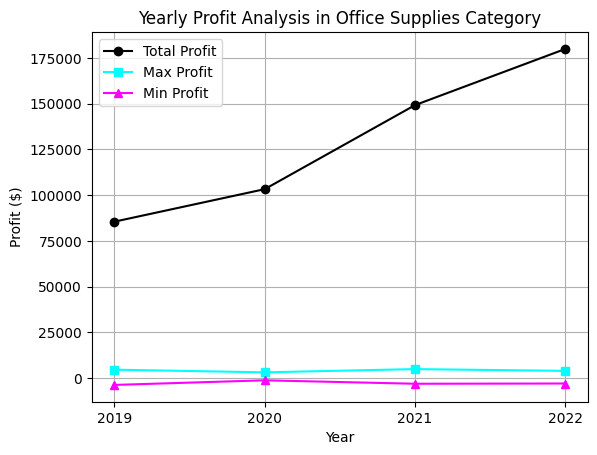

In [90]:
import matplotlib.pyplot as plt

# Aggregate total profit, maximum profit, and minimum profit for each year
yearly_total_profit = grouped_office_supplies_sales['Profit'].sum()
yearly_max_profit = grouped_office_supplies_sales['Profit'].max()
yearly_min_profit = grouped_office_supplies_sales['Profit'].min()

# Plot consolidated line graphs
plt.plot(yearly_total_profit.index, yearly_total_profit.values, marker='o', linestyle='-', color='black', label='Total Profit')
plt.plot(yearly_max_profit.index, yearly_max_profit.values, marker='s', linestyle='-', color='cyan', label='Max Profit')
plt.plot(yearly_min_profit.index, yearly_min_profit.values, marker='^', linestyle='-', color='magenta', label='Min Profit')

# Add labels and title
plt.title('Yearly Profit Analysis in Office Supplies Category')
plt.xlabel('Year')
plt.ylabel('Profit ($)')
plt.xticks(yearly_total_profit.index)
plt.legend()
plt.grid(True)
plt.show()

#### c. Segment-wise Profit in Office Supplies Category

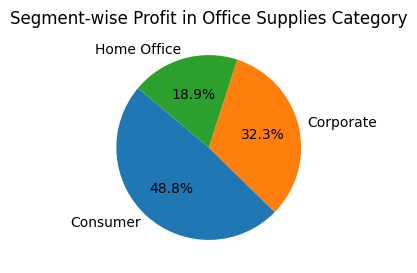

In [91]:
# Filter the data for the Technology category
technology_data = ACX_df[ACX_df['Category'] == 'Office Supplies']

# Group the filtered data by segment and calculate total profit for each segment
segment_wise_profit = technology_data.groupby('Segment')['Profit'].sum()

# Plot the pie chart
plt.figure(figsize=(3, 3))
plt.pie(segment_wise_profit, labels=segment_wise_profit.index, autopct='%1.1f%%', startangle=140)
plt.title('Segment-wise Profit in Office Supplies Category')
plt.show()

### 13. Discount Analysis

#### a. Profit vs Discount

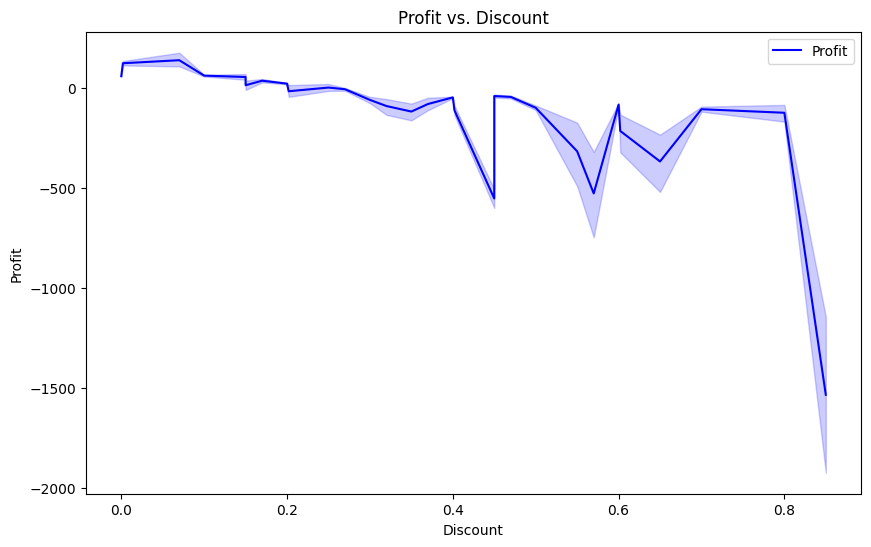

In [92]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount', y='Profit', data=ACX_df, color='blue')
plt.legend(['Profit'])
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

#### b. Kernel Density Estimation of Discount

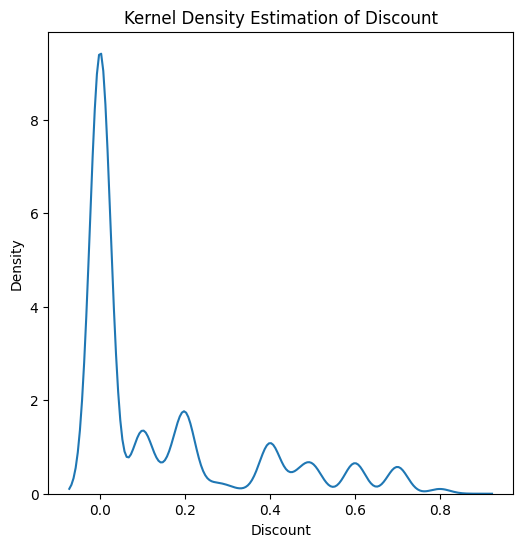

In [93]:
fig, axes = plt.subplots(figsize=(6, 6))
sns.kdeplot(x=ACX_df['Discount'], ax=axes)
axes.set_title('Kernel Density Estimation of Discount')
axes.set_xlabel('Discount')
plt.show()

#### c. Segment wise Discount in each Category

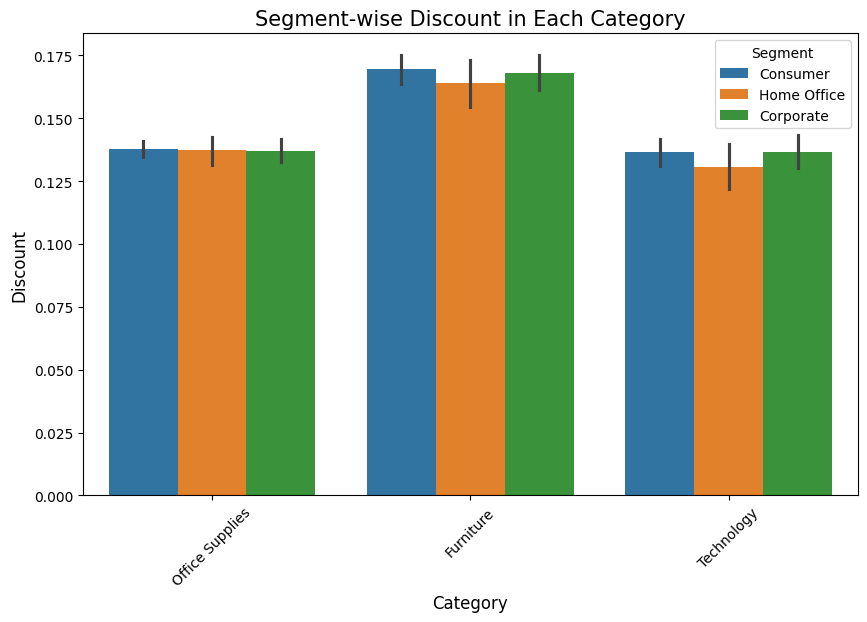

In [94]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Discount', hue='Segment', data=ACX_df)
plt.title('Segment-wise Discount in Each Category', fontsize=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Discount', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()